# **I- Analysis of Student Mental Health Survey**

1. [Introduction](#introduction)
2. [Data Overview](#data-overview)
3. [Data Cleaning and Exploration](#data-cleaning-and-exploration)
4. [Analysis and Results](#analysis-and-results)
   - [Stress Frequency Distribution](#stress-frequency-distribution)
   - [Stress Frequency by Gender](#stress-frequency-by-gender)
   - [Sleep Hours by Gender](#sleep-hours-by-gender)
   - [Distribution of Stress Levels by UIR Student Status](#distribution-of-stress-levels-by-uir-student-status)
   - [Stress Evaluation Distribution by Study Level](#stress-evaluation-distribution-by-study-level)
   - [Academic-Social Balance as a Function of Study Year](#academic-social-balance-as-a-function-of-study-year)
5. [Conclusions](#conclusions)

## Introduction

This report presents an analysis of a survey conducted to assess the mental health status of students. The survey aims to identify the primary sources of stress among students, their stress management techniques, and the overall impact on their academic and social life. Understanding these factors is crucial for developing strategies to support student well-being.

## **Loading the Dataset**

In [1]:
import pandas as pd
from google.colab import files

# Upload and load the Excel file in a single step
uploaded = files.upload()  # User uploads the file

# Extract the file name dynamically for flexibility
file_name = list(uploaded.keys())[0]

# Load and preview the data
data = pd.read_excel(file_name)
print("File loaded successfully!")
data.head()


Saving Student_Mental_Health_DATA.xlsx to Student_Mental_Health_DATA.xlsx
File loaded successfully!


,Quel est votre sexe ?,Entrez votre âge :\n,Quel est votre niveaux d'études ?\n,Dans quelle année d’étude êtes-vous ?\n,Êtes-vous étudiant au sein de l'UIR ?,Quelles sont vos principales sources de stress liées à la vie étudiante ?,Comment gérez-vous le stress au quotidien ?,"À quelle fréquence ressentez-vous des symptômes physiques liés au stress (maux de tête, troubles du sommeil, etc.) ?","Quelle est votre perception de l'équilibre entre travail académique, vie sociale et activités de bien-être personnel?",Comment évaluez-vous votre niveau de stress global en tant qu’étudiant ?,Combien d’heures de sommeil en moyenne obtenez-vous par nuit ?,"Combien d'heures en moyenne passez-vous par jour sur les appareils électroniques (téléphone, ordinateur) ?","À quelle fréquence participez-vous aux activités universitaires (Sports, Clubs, Workshops, etc.) ?"
0,Femme,21,Cycle ingénieur,4ème année,Oui,Charge de travail académique;Pression sociale;,Temps avec des amis/famille;Méditation/Relaxat...,5,Déséquilibré en faveur de la vie sociale,4,6,10,rarement
1,Femme,22,Master,4ème année,Oui,Pression sociale;Problèmes financiers,Exercice physique;Divertissements personnels (...,4,Déséquilibré en faveur de la vie sociale,5,7,9,jamais
2,Homme,24,Licence,3ème année,Oui,Problèmes financiers;Pression sociale,Méditation/Relaxation;Exercice physique,7,Déséquilibré en faveur des activités personnel...,4,6,6,rarement
3,Femme,20,Cycle ingénieur,3ème année,Oui,Pression sociale;Problèmes financiers,Exercice physique;Temps avec des amis/famille,4,Équilibré,1,8,4,fréquemment
4,Femme,21,Cycle ingénieur,4ème année,Oui,Charge de travail académique;Pression sociale,"Divertissements personnels (lecture, films, sé...",9,Équilibré,2,8,6,occasionnellement


In [2]:
print(data.columns)
print(len(data.columns))

Index(['Quel est votre sexe ?', 'Entrez votre âge :\n',
       'Quel est votre niveaux d'études ?\n',
       'Dans quelle année d’étude êtes-vous ?\n',
       'Êtes-vous étudiant au sein de l'UIR ?',
       'Quelles sont vos principales sources de stress liées à la vie étudiante ?',
       'Comment gérez-vous le stress au quotidien ?',
       'À quelle fréquence ressentez-vous des symptômes physiques liés au stress (maux de tête, troubles du sommeil, etc.) ?',
       'Quelle est votre perception de l'équilibre entre travail académique, vie sociale et activités de bien-être personnel?',
       'Comment évaluez-vous votre niveau de stress global en tant qu’étudiant ?',
       'Combien d’heures de sommeil en moyenne obtenez-vous par nuit ?',
       'Combien d'heures en moyenne passez-vous par jour sur les appareils électroniques (téléphone, ordinateur) ?',
       'À quelle fréquence participez-vous aux activités universitaires (Sports, Clubs, Workshops, etc.) ?'],
      dtype='object')
13

## **Data Cleaning and Exploration**

**Renaming Columns**

For ease of use, we rename the columns:

In [3]:
# Rename columns for easier usage
data.columns = [
    "Gender",
    "Age",
    "Study_Level",
    "Study_Year",
    "Is_UIR_Student",
    "Stress_Sources",
    "Stress_Management",
    "Stress_Frequency",
    "Academic_Social_Balance",
    "Stress_Evaluation",
    "Sleep_Hours",
    "Device_Time",
    "Activity_Frequency"
]


## **Missing Values**

We check for missing values in the dataset:

In [4]:
print(data.isnull().sum())

Gender                     0
Age                        0
Study_Level                0
Study_Year                 0
Is_UIR_Student             0
Stress_Sources             0
Stress_Management          0
Stress_Frequency           0
Academic_Social_Balance    0
Stress_Evaluation          0
Sleep_Hours                0
Device_Time                0
Activity_Frequency         0
dtype: int64


**Observation:** There are no missing values in the dataset, ensuring data completeness for the analysis.


## **Summary Statistics**

We compute summary statistics for both numerical and categorical variables:

In [5]:
print(data.describe(include='all'))

       Gender         Age      Study_Level  Study_Year Is_UIR_Student  \
count     367  367.000000              367         367            367   
unique      2         NaN                4           6              2   
top     Homme         NaN  Cycle ingénieur  4ème année            Oui   
freq      192         NaN              114          82            231   
mean      NaN   22.768392              NaN         NaN            NaN   
std       NaN    3.062783              NaN         NaN            NaN   
min       NaN   18.000000              NaN         NaN            NaN   
25%       NaN   20.000000              NaN         NaN            NaN   
50%       NaN   22.000000              NaN         NaN            NaN   
75%       NaN   25.000000              NaN         NaN            NaN   
max       NaN   29.000000              NaN         NaN            NaN   

                                       Stress_Sources  \
count                                             367   
unique   

## **Key Observations:**

**- Age:** The average age is approximately 22 years, with ages ranging from 18 to 29.

**- Stress_Frequency:** The mean stress frequency is around 5.2 on a scale of 1 to 10.

**- Stress_Evaluation:** The average self-reported stress level is approximately 3,47.

**- Sleep_Hours:** Students sleep an average aroud 6 hours per night.

**- Device_Time:** Average daily device usage is about 6.5 hours

## **Gender Distribution**

We explore the gender distribution:

In [6]:
print(data['Gender'].value_counts())

Gender
Homme    192
Femme    175
Name: count, dtype: int64


**Observation:** The dataset has a relatively balanced gender distribution.

## **UIR Student Status**

We examine the distribution of UIR students:

In [ ]:
print(data['Is_UIR_Student'].value_counts())

Is_UIR_Student
Oui    231
Non    136
Name: count, dtype: int64


**Observation:** A majority of the respondents are UIR students.

In [ ]:
data.head()

,Gender,Age,Study_Level,Study_Year,Is_UIR_Student,Stress_Sources,Stress_Management,Stress_Frequency,Academic_Social_Balance,Stress_Evaluation,Sleep_Hours,Device_Time,Activity_Frequency
0,Femme,21,Cycle ingénieur,4ème année,Oui,Charge de travail académique;Pression sociale;,Temps avec des amis/famille;Méditation/Relaxat...,5,Déséquilibré en faveur de la vie sociale,4,6,10,rarement
1,Femme,22,Master,4ème année,Oui,Pression sociale;Problèmes financiers,Exercice physique;Divertissements personnels (...,4,Déséquilibré en faveur de la vie sociale,5,7,9,jamais
2,Homme,24,Licence,3ème année,Oui,Problèmes financiers;Pression sociale,Méditation/Relaxation;Exercice physique,7,Déséquilibré en faveur des activités personnel...,4,6,6,rarement
3,Femme,20,Cycle ingénieur,3ème année,Oui,Pression sociale;Problèmes financiers,Exercice physique;Temps avec des amis/famille,4,Équilibré,1,8,4,fréquemment
4,Femme,21,Cycle ingénieur,4ème année,Oui,Charge de travail académique;Pression sociale,"Divertissements personnels (lecture, films, sé...",9,Équilibré,2,8,6,occasionnellement


## **Plot Graphs**
### **Histogram: Stress Frequency Distribution**

We analyze the distribution of stress frequency among students.


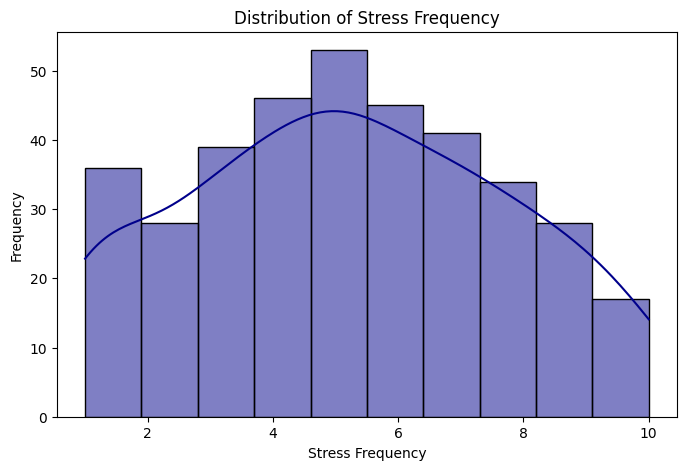

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of stress frequency
plt.figure(figsize=(8, 5))
sns.histplot(data['Stress_Frequency'], kde=True, bins=10, color='darkblue')
plt.title('Distribution of Stress Frequency')
plt.xlabel('Stress Frequency')
plt.ylabel('Frequency')
plt.show()

**Interpretation:**

- The distribution of stress frequency among students is relatively symmetric and approximately bell-shaped, indicating a near-normal distribution.

- Most students experience moderate stress levels, as indicated by the peak near the middle of the range.

- A notable portion of students report both low (scores below 3) and high stress frequencies (scores above 8), though these are less common than moderate levels.

- The fitted curve emphasizes the central tendency of the data while showcasing variability in stress experiences across the student population.

### **Boxplot: Stress Frequency by Gender**

We examine how stress frequency varies between genders.

<ipython-input-72-b66a3d44326b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Stress_Frequency', data=data, palette=custom_palette)


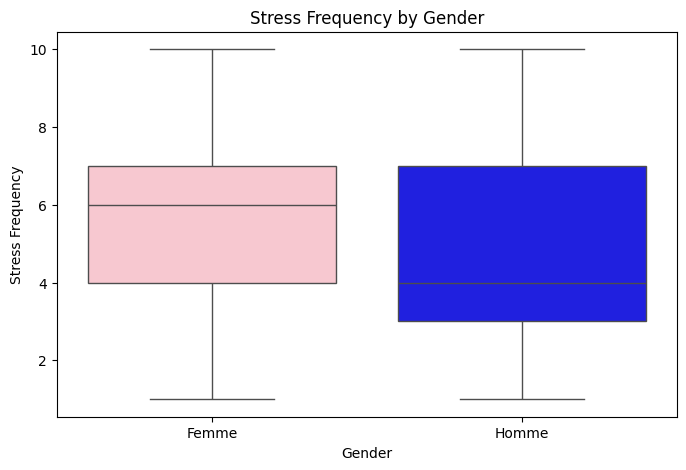

In [ ]:
plt.figure(figsize=(8, 5))

custom_palette = {'Femme': 'pink', 'Homme': 'blue'}

sns.boxplot(x='Gender', y='Stress_Frequency', data=data, palette=custom_palette)

plt.title('Stress Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Stress Frequency')
plt.show()

**Interpretation:**

- Femmes: Tend to report slightly higher stress frequencies (median around 6) with a narrower interquartile range, indicating more consistent stress levels.

- Hommes: Show lower median stress frequency (around 4) but greater variability in stress levels.

- Both genders have similar overall ranges, but femmes show a concentration of higher stress levels compared to hommes.

### **Boxplot: Sleep Hours by Gender**

We explore differences in sleep patterns between genders.

<ipython-input-73-e0728ebe0e23>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Sleep_Hours', data=data, palette=custom_palette)


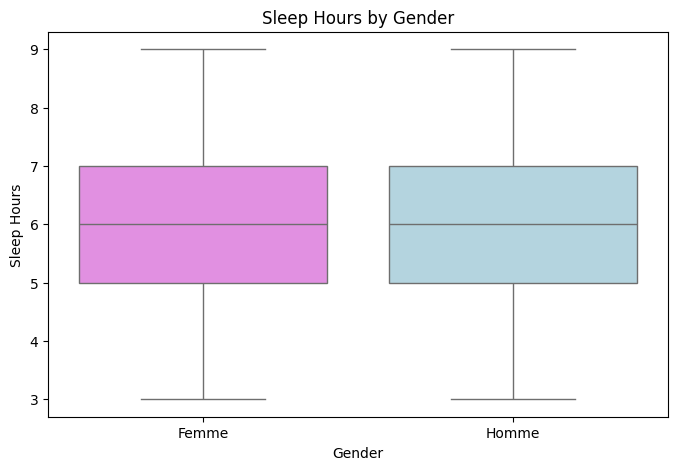

In [ ]:
plt.figure(figsize=(8, 5))

custom_palette = {'Femme': 'violet', 'Homme': 'lightblue'}

sns.boxplot(x='Gender', y='Sleep_Hours', data=data, palette=custom_palette)

plt.title('Sleep Hours by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Hours')
plt.show()

**Interpretation:**

- Both genders have similar median sleep hours.

- Males show slightly higher variability in sleep hours.

- Some students report sleeping less than 5 hours per night, which may impact stress levels.

### **Bar plot : Distribution of Stress Levels by UIR Student Status**

We categorize stress evaluation into Low, Medium, and High levels and compare them between UIR and non-UIR students.

<ipython-input-75-a50b44169f60>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stress_distribution = data.groupby(['Is_UIR_Student', 'Stress_Level']).size().reset_index(name='Count')


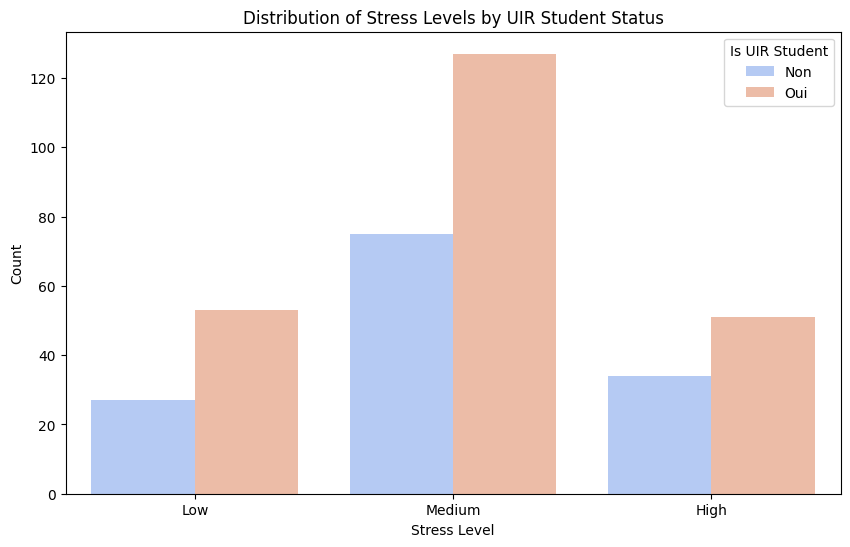

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create bins for Stress Evaluation (group into levels)
data['Stress_Level'] = pd.cut(
    data['Stress_Evaluation'],
    bins=[0, 2, 4, 5],
    labels=['Low', 'Medium', 'High']
)

# Count distribution of Stress Levels by UIR status
stress_distribution = data.groupby(['Is_UIR_Student', 'Stress_Level']).size().reset_index(name='Count')

# Ensure all levels are present, even if some have zero counts
stress_distribution['Stress_Level'] = pd.Categorical(
    stress_distribution['Stress_Level'],
    categories=['Low', 'Medium', 'High'],
    ordered=True
)

# Grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Stress_Level',
    y='Count',
    hue='Is_UIR_Student',
    data=stress_distribution,
    palette='coolwarm'
)

plt.title('Distribution of Stress Levels by UIR Student Status')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Is UIR Student')
plt.show()


**Interpretation:**

- Both UIR and non-UIR students predominantly fall into the 'Medium' stress level category, with UIR students having a significantly higher count.

- UIR students also show a higher count in the 'Low' stress level category compared to non-UIR students.

- In the 'High' stress level category, both UIR and non-UIR students have similar counts, indicating no significant difference in high stress levels between the two groups.

### **Bar plot : Stress Evaluation Distribution by Study Level**

We analyze stress levels across different study levels.

<ipython-input-76-e6b511be7148>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stress_distribution = data.groupby(['Study_Level', 'Stress_Level_Category']).size().reset_index(name='Count')


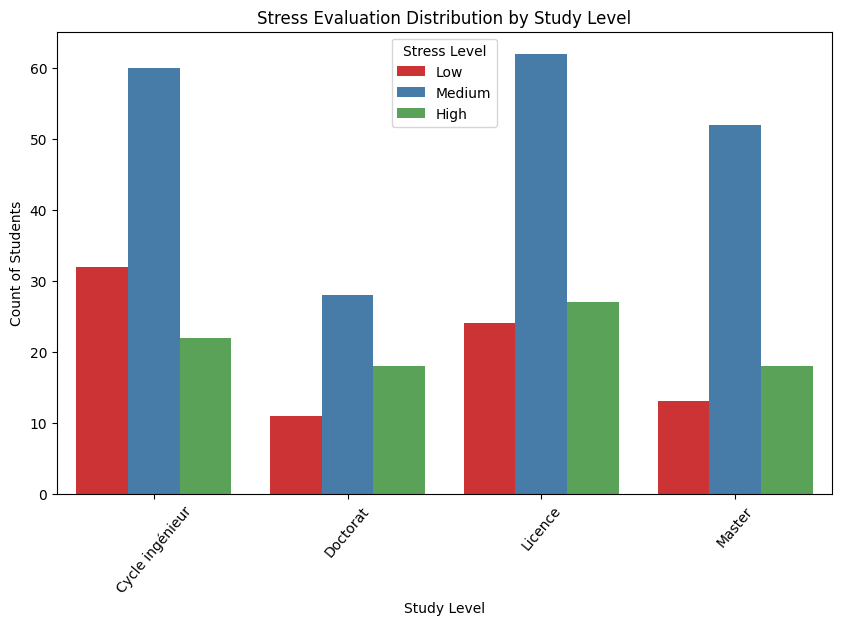

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Categorize Stress Evaluation into bins: Low, Medium, High
data['Stress_Level_Category'] = pd.cut(
    data['Stress_Evaluation'],
    bins=[0, 2, 4, 5],  # You can adjust the bin ranges based on your data
    labels=['Low', 'Medium', 'High']
)

# Count distribution of Stress Evaluation categories by Study Level
stress_distribution = data.groupby(['Study_Level', 'Stress_Level_Category']).size().reset_index(name='Count')

# Create grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Study_Level',
    y='Count',
    hue='Stress_Level_Category',
    data=stress_distribution,
    palette='Set1'
)

plt.title('Stress Evaluation Distribution by Study Level')
plt.xlabel('Study Level')
plt.ylabel('Count of Students')
plt.legend(title='Stress Level')
plt.xticks(rotation=50)
plt.show()

**Interpretation:**

**- Licence Students:** Higher counts in 'Medium' stress levels.

**- Master's Students:** Notable counts in 'High' stress levels.

**- Doctorate Students:** Majority report 'High' stress levels.

**- Cycle ingénieur Students:** Spread across 'Low' and 'Medium' stress levels.

This plot highlights that Cycle Ingénieur and Licence students generally exhibit lower stress levels, while Doctorat and Master students experience relatively higher stress, possibly due to the demands of advanced studies.

### **Line plot :  Linear Relationship Between Stress Level and Device Time**

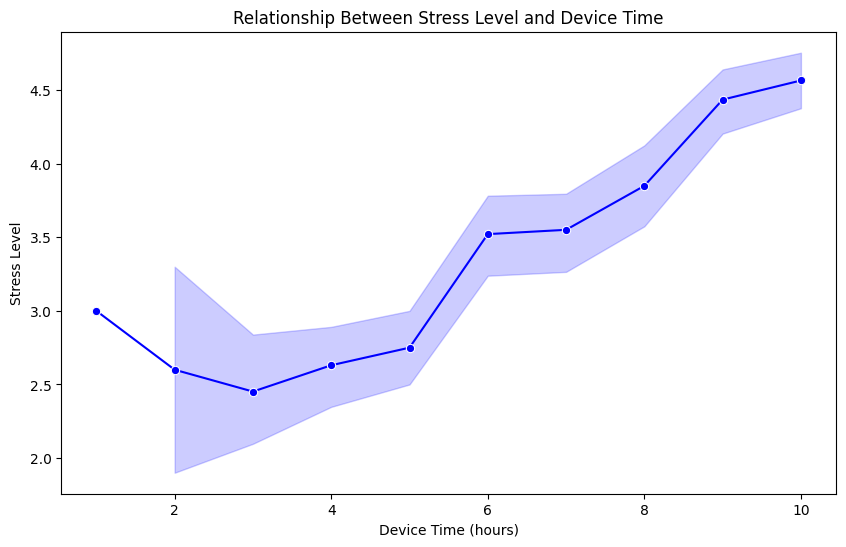

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a linear plot to visualize the relationship between stress level and device time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Device_Time', y='Stress_Evaluation', data=data, color='blue', marker='o')

# Adding titles and labels
plt.title('Relationship Between Stress Level and Device Time')
plt.xlabel('Device Time (hours)')
plt.ylabel('Stress Level')

# Displaying the plot
plt.show()


- The plot suggests a potential link between device usage time, stress levels, and its likely impact on sleep quality:

-> This highlights that **moderate device use could minimize stress and support better sleep**, **while excessive use risks elevating stress and disrupting sleep cycles.**


### **Correlation Matrix**

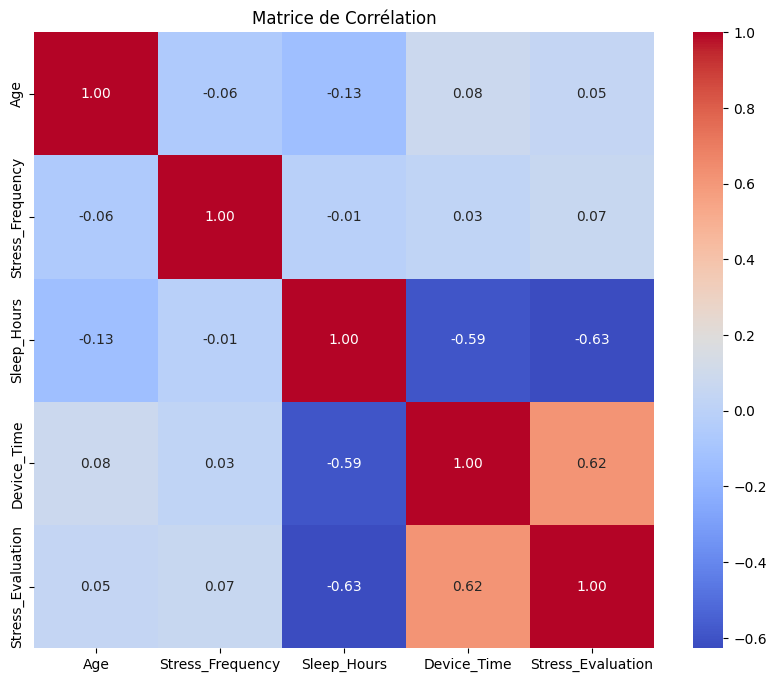

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Imaginons que 'data' est votre DataFrame avec les colonnes pertinentes
corr_matrix = data[['Age', 'Stress_Frequency', 'Sleep_Hours', 'Device_Time', 'Stress_Evaluation']].corr()

# Visualiser la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()


- The matrix highlights device time and sleep hours as the most significant factors influencing stress levels, with increased device time elevating stress and reduced sleep exacerbating it. Managing these two factors could be crucial for reducing stress.

# **Conclusions**

## **Key Findings:**

**- Stress Levels:** A significant portion of students experience moderate to high stress levels.

**- Gender Differences:** Female students report higher stress frequencies and slightly less sleep.

**- UIR vs. Non-UIR Students:** Non-UIR students have a higher proportion of high stress levels.

**- Study Level Impact:** Advanced study levels (Master's and Doctorate) are associated with higher stress.

**- Academic-Social Balance:** Imbalance increases in favor of academic work in later study years.

# **Some other statistical tests**

### **1. Stress Levels by Gender**
- **Hypothesis:**
    - **Null Hypothesis**(H0): Stress levels are independent of gender.
    - **Alternative Hypothesis** (Ha): Stress levels vary with gender.

In [ ]:
# Create a contingency table with gender and stress levels
contingency_table = pd.crosstab(data['Gender'], data['Stress_Evaluation'])

# Perform chi-squared test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 1.9973617607693308
P-value: 0.7362441591889828


**Interpretation of result :**

- Chi-Squared Value: 1.997 indicates a weak association between gender and stress levels.

- P-Value: 0.736 (greater than the standard significance level of 0.05) suggests that we fail to reject the null hypothesis.

->There is **no statistically significant relationship** between gender and stress levels. This means that **stress levels are likely independent of gender** in this dataset.

### **2. Stress Levels by sleep hours:**
#### **Using Pearson's correlation**
- **hypothesis:**
    - **Null Hypothesis** (𝐻0):There is no linear relationship between stress levels and sleep hours (𝜌=0)
    - **Alternative Hypothesis** (𝐻𝐴): There is a linear relationship between stress levels and sleep hours (𝜌≠0).


In [ ]:
from scipy.stats import pearsonr

stress_levels = data['Stress_Evaluation']
sleep_hours = data['Sleep_Hours']

# Calculate Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(stress_levels, sleep_hours)

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")


Pearson Correlation Coefficient: -0.6272059015116097
P-value: 1.5945415665897883e-41


**Interpretation:**

- Pearson Correlation Coefficient: −0.627, indicating a strong negative linear relationship between stress levels and sleep hours.
This means that as sleep hours increase, stress levels tend to decrease

- P-value:  1.5945415665897883e-41
  (very small) — statistically significant,  strongly rejects the null hypothesis (H0).

-> We reject the null hypothesis and accept that there is a significant negative linear relationship between sleep hours and stress levels.**Less sleep correlates with higher stress.**

### **3. Stress level by study levels:**
#### **Using ANOVA**
- **Hypothesis:**
  - **Null Hypothesis** (𝐻0): The mean stress levels are the same across all study levels.
  - **Alternative Hypothesis** (𝐻𝐴): At least one study level group has a different mean stress level.

In [ ]:
from scipy.stats import f_oneway

# 'Study_Level' is the categorical variable and 'Stress_Evaluation' is the numerical variable
groups = [group['Stress_Evaluation'] for name, group in data.groupby('Study_Level')]

# let's # Perform one-way ANOVA
f_statistic, p_value = f_oneway(*groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 1.1278241374314195
P-value: 0.3376881258129187


**Interpretation:**

- F-statistic: 1.128, which suggests that there is not much variability in stress levels between the study level groups relative to the variability within each group.


- P-value: 0.337 — This is higher than the common significance level of 0.05.

-> We fail to reject the null hypothesis (𝐻0), indicating that there is no significant difference in the mean stress levels across the different study levels. **The stress levels do not vary significantly by study level.**

### **4- Stress level by Device time**

#### **Hypothesis for Pearson's correlation:**
- **Null Hypothesis** (𝐻0): There is no linear relationship between stress levels and device time (𝜌=0).
- **Alternative Hypothesis** (𝐻𝐴): There is a linear relationship between stress levels and device time (𝜌≠0).

In [ ]:
device_time = data['Device_Time']
stress_levels = data['Stress_Evaluation']

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(stress_levels, device_time)

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.6165755707101299
P-value: 8.29723187708625e-40


**Interpretation:**

- Pearson Correlation Coefficient: 0.617, indicating a strong positive linear relationship between stress levels and device time. This suggests that as device time increases, stress levels also tend to rise.

- P-value: 8.29723187708625e-40 — which is extremely small and much lower than the standard significance level (p<0.05).

-> We reject the null hypothesis (𝐻0) and accept that there is a significant linear relationship between stress levels and device time. The positive correlation suggests that **more time spent on devices is slightly associated with higher stress levels.**

### **5- Device time by sleep hours:**

#### **Hypotheses for One-Tailed Pearson Test:**
- **Null Hypothesis** (𝐻0): There is no negative relationship between device time and sleep hours (ρ≥0).

- **Alternative Hypothesis** (𝐻𝐴): There is a negative relationship between device time and sleep hours (ρ<0).

In [ ]:
from scipy.stats import pearsonr

# Assuming 'Device_Time' and 'Sleep_Hours' are numerical variables in your DataFrame
device_time = data['Device_Time']
sleep_hours = data['Sleep_Hours']

# Calculate Pearson correlation coefficient and p-value
correlation, two_tailed_p_value = pearsonr(device_time, sleep_hours)

# Convert to one-tailed p-value for a negative relationship
one_tailed_p_value = two_tailed_p_value / 2 if correlation < 0 else 1.0

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"One-Tailed P-value: {one_tailed_p_value}")


Pearson Correlation Coefficient: -0.5928180533798504
One-Tailed P-value: 1.683128499334469e-36


**Interpretation:**

- Pearson Correlation Coefficient: -0.592 ; This indicates a negative correlation between device time and sleep hours. **As device time increases, sleep hours tend to decrease.**

- One-Tailed P-value:1.683128499334469e-36 ; This is extremely small, indicating strong statistical significance.

-> We reject the null hypothesis (𝐻0), suggesting there is a significant negative linear relationship between device time and sleep hours. **This means that increased device time is associated with fewer hours of sleep.**

### **6- Relationship Between Academic Social Balance, Activity Frequency and stress levels**

- **Hypothesis for Academic Social Balance and Stress Level:**

Null Hypothesis (H0​): Academic Social Balance has no effect on stress levels.

Alternative Hypothesis (H A): Academic Social Balance affects stress levels.

- **Hypothesis for Activity Frequency and Stress Level:**

Null Hypothesis (H0): Activity Frequency has no effect on stress levels.

Alternative Hypothesis (H A): Activity Frequency affects stress levels.



In [ ]:
import pandas as pd
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# ANOVA for Academic Social Balance and Stress Level
balance_groups = [group['Stress_Evaluation'] for name, group in data.groupby('Academic_Social_Balance')]
f_stat_balance, p_value_balance = f_oneway(*balance_groups)

print("Academic Social Balance:")
print(f"F-statistic: {f_stat_balance}")
print(f"P-value: {p_value_balance}")

# ANOVA for Activity Frequency and Stress Level
activity_groups = [group['Stress_Evaluation'] for name, group in data.groupby('Activity_Frequency')]
f_stat_activity, p_value_activity = f_oneway(*activity_groups)

print("\nActivity Frequency:")
print(f"F-statistic: {f_stat_activity}")
print(f"P-value: {p_value_activity}")



Academic Social Balance:
F-statistic: 72.44292762194128
P-value: 4.852519751162556e-45

Activity Frequency:
F-statistic: 39.90289224903397
P-value: 2.6168533721924344e-22


**Key Takeaways:**

- Academic-Social Balance: Imbalances (e.g., skewed toward academic or social life) are significantly linked to varying stress levels. A balanced lifestyle may help reduce stress.

- Activity Frequency: Regular or frequent participation in activities (e.g., exercise, hobbies) may help manage stress more effectively, while inactivity could exacerbate it.

# **II- Predicting Stress Levels Using Machine Learning**

In this part of our project we are developing a machine learning model to predict **stress levels** using features like Sleep_Hours, Device_Time, Activity_Frequency and more. By preprocessing data, training models, and optimizing performance, the aim is to uncover key stress factors and build an accurate predictive tool.

In [7]:
data.head()

,Gender,Age,Study_Level,Study_Year,Is_UIR_Student,Stress_Sources,Stress_Management,Stress_Frequency,Academic_Social_Balance,Stress_Evaluation,Sleep_Hours,Device_Time,Activity_Frequency
0,Femme,21,Cycle ingénieur,4ème année,Oui,Charge de travail académique;Pression sociale;,Temps avec des amis/famille;Méditation/Relaxat...,5,Déséquilibré en faveur de la vie sociale,4,6,10,rarement
1,Femme,22,Master,4ème année,Oui,Pression sociale;Problèmes financiers,Exercice physique;Divertissements personnels (...,4,Déséquilibré en faveur de la vie sociale,5,7,9,jamais
2,Homme,24,Licence,3ème année,Oui,Problèmes financiers;Pression sociale,Méditation/Relaxation;Exercice physique,7,Déséquilibré en faveur des activités personnel...,4,6,6,rarement
3,Femme,20,Cycle ingénieur,3ème année,Oui,Pression sociale;Problèmes financiers,Exercice physique;Temps avec des amis/famille,4,Équilibré,1,8,4,fréquemment
4,Femme,21,Cycle ingénieur,4ème année,Oui,Charge de travail académique;Pression sociale,"Divertissements personnels (lecture, films, sé...",9,Équilibré,2,8,6,occasionnellement


### **1- Data Preprocessing:**

   - Handle Missing Values:

In [8]:
# Check for missing values in each column
print(data.isnull().sum())


Gender                     0
Age                        0
Study_Level                0
Study_Year                 0
Is_UIR_Student             0
Stress_Sources             0
Stress_Management          0
Stress_Frequency           0
Academic_Social_Balance    0
Stress_Evaluation          0
Sleep_Hours                0
Device_Time                0
Activity_Frequency         0
dtype: int64


All features in the dataset are complete, with no missing values identified. This ensures the data is ready for preprocessing and model development without requiring imputation or data removal.

- **Numerical Features:** Age,  Stress_Evaluation, Sleep_Hours, Device_Time, Stress_Frequency

- **Categorical Features:** Gender, Study_Level, Study_Year, Is_UIR_Student, Stress_Sources, Stress_Management, Academic_Social_Balance, Activity_Frequency


### **Encoding Categorical Data:**

**Label Encoding for Categorical Variables**

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode binary columns
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Femme = 0, Homme = 1
data['Is_UIR_Student'] = label_encoder.fit_transform(data['Is_UIR_Student'])  # Oui = 1, Non = 0


- This code uses LabelEncoder to convert categorical binary variables ('Gender' and 'Is_UIR_Student') into numeric values for machine learning models.

**One-Hot Encoding for Nominal Variables**

In [10]:
# Apply one-hot encoding to nominal columns
data = pd.get_dummies(data, columns=['Study_Level', 'Study_Year'], drop_first=True)  # drop_first=True to avoid multicollinearity


- This code applies one-hot encoding to the 'Study_Level' and 'Study_Year' columns, transforming them into binary features to prevent multicollinearity.

**Label Encoding for Activity Frequency**

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode Activity_Frequency
label_encoder = LabelEncoder()
data['Activity_Frequency'] = label_encoder.fit_transform(data['Activity_Frequency'])


This code applies label encoding to the 'Activity_Frequency' column, converting categorical values into numerical labels for model compatibility.

**TF-IDF Vectorization for Text Data**

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine text columns into one for TF-IDF processing
text_columns = ['Stress_Sources', 'Academic_Social_Balance', 'Stress_Management']
for col in text_columns:
    vectorizer = TfidfVectorizer(max_features=100)  # Limit features to reduce dimensionality
    tfidf_matrix = vectorizer.fit_transform(data[col].fillna(''))

    # Convert TF-IDF matrix to DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"{col}_{word}" for word in vectorizer.get_feature_names_out()])

    # Add to the main DataFrame
    data = pd.concat([data, tfidf_df], axis=1)

    # Drop the original column after encoding
    data.drop(columns=[col], inplace=True)


This code applies TF-IDF vectorization to multiple text columns, transforming them into numerical features and reducing dimensionality by limiting the number of features.

### **Feature Scaling**

To standardize the numerical columns in our dataset, we'll use StandardScaler from sklearn.preprocessing. This scaler will transform the numerical features to have a mean of 0 and a standard deviation of 1, which is essential for models like LDA and Linear Regression that are sensitive to feature scaling.

In [13]:
from sklearn.preprocessing import StandardScaler

# Separate target variable and features
X = data.drop(columns=['Stress_Evaluation'])  # Features
y = data['Stress_Evaluation']                # Target variable

# Identify numerical columns for scaling
numerical_columns = ['Age', 'Stress_Frequency', 'Sleep_Hours', 'Device_Time']
tfidf_columns = [col for col in data.columns if col.startswith(('Stress_Sources',
                                                                'Academic_Social_Balance',
                                                                'Stress_Management'))]
# Combine numerical and TF-IDF columns
columns_to_scale = numerical_columns + tfidf_columns

# Initialize scaler
scaler = StandardScaler()

# Scale the identified columns
X_scaled = X.copy()
X_scaled[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# Verify the scaling
print("Scaled Features Description:")
print(X_scaled[columns_to_scale].describe())


Scaled Features Description:
                Age  Stress_Frequency   Sleep_Hours   Device_Time  \
count  3.670000e+02      3.670000e+02  3.670000e+02  3.670000e+02   
mean  -2.710517e-16      1.258454e-16 -7.744335e-17 -9.680419e-18   
std    1.001365e+00      1.001365e+00  1.001365e+00  1.001365e+00   
min   -1.559008e+00     -1.641978e+00 -2.259626e+00 -2.333550e+00   
25%   -9.051154e-01     -8.603879e-01 -8.085626e-01 -6.300932e-01   
50%   -2.512230e-01     -7.879790e-02 -8.303087e-02 -2.042291e-01   
75%    7.296157e-01      7.027921e-01  6.425008e-01  8.604312e-01   
max    2.037401e+00      1.875177e+00  2.093564e+00  1.499227e+00   

       Stress_Sources_académique  Stress_Sources_charge  Stress_Sources_de  \
count               3.670000e+02           3.670000e+02         367.000000   
mean               -7.986345e-17          -7.986345e-17           0.000000   
std                 1.001365e+00           1.001365e+00           1.001365   
min                -1.198249e+00     

In [ ]:
data.head()

,Gender,Age,Is_UIR_Student,Stress_Frequency,Stress_Evaluation,Sleep_Hours,Device_Time,Activity_Frequency,Study_Level_Doctorat,Study_Level_Licence,...,Stress_Management_exercice,Stress_Management_famille,Stress_Management_films,Stress_Management_lecture,Stress_Management_méditation,Stress_Management_personnels,Stress_Management_physique,Stress_Management_relaxation,Stress_Management_séries,Stress_Management_temps
0,0,21,1,5,4,6,10,3,False,False,...,0.000000,0.353030,0.000000,0.000000,0.434078,0.000000,0.000000,0.434078,0.000000,0.353030
1,0,22,1,4,5,7,9,1,False,False,...,0.377087,0.000000,0.378315,0.378315,0.000000,0.378315,0.377087,0.000000,0.378315,0.000000
2,1,24,1,7,4,6,6,3,False,True,...,0.482208,0.000000,0.000000,0.000000,0.517180,0.000000,0.482208,0.517180,0.000000,0.000000
3,0,20,1,4,1,8,4,0,False,False,...,0.415075,0.362057,0.000000,0.000000,0.000000,0.000000,0.415075,0.000000,0.000000,0.362057
4,0,21,1,9,2,8,6,2,False,False,...,0.000000,0.293428,0.337491,0.337491,0.000000,0.337491,0.000000,0.000000,0.337491,0.293428


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Step 1: Prepare features (X) and target (y)
X = data.drop(columns=["Stress_Evaluation"])  # Exclude the target variable
y = data["Stress_Evaluation"]  # Define the target variable

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**X:** Contains all the features (independent variables) that will be used to make predictions.

**y:** Contains the target variable (dependent variable) that you want to predict.

## **Training models using 1 feature:**

### **Case 1: Sleep Hours as Feature, Stress Evaluation as Target**



**K-Nearest Neighbors (KNN)**

In [28]:
# =========================
# K-Nearest Neighbors (KNN)
# =========================
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Select feature and target
X_train_sleep = X_train[['Sleep_Hours']]
X_test_sleep = X_test[['Sleep_Hours']]

# Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn.fit(X_train_sleep, y_train)

# Make predictions
y_pred_knn_sleep = knn.predict(X_test_sleep)

# Evaluate the model
print("KNN (Sleep Hours) Evaluation:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_knn_sleep):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn_sleep, average='macro'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_knn_sleep, average='macro'):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_knn_sleep, average='macro'):.4f}")


KNN (Sleep Hours) Evaluation:
Accuracy:  0.3649
Precision: 0.3052
Recall:    0.3956
F1-Score:  0.3075


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Interpretation:**

The KNN model achieves about 36% accuracy using only Sleep_Hours, indicating limited predictive power. Its precision (31%) suggests that when it predicts a stress level, it’s correct roughly a third of the time, while a recall of 40% shows it catches less than half of actual cases. The resulting F1-score (31%) reflects a modest balance between precision and recall, highlighting that Sleep_Hours alone is insufficient to robustly distinguish between different stress levels.

**Logistic Regression**

In [16]:
# Select feature and target
X_train_sleep = X_train[['Sleep_Hours']]
X_test_sleep = X_test[['Sleep_Hours']]

# Train Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_sleep, y_train)

# Make predictions
y_pred_logreg_sleep = logreg.predict(X_test_sleep)

# Evaluate the model
print("\nLogistic Regression (Sleep Hours) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg_sleep):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg_sleep, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logreg_sleep, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_logreg_sleep, average='macro'):.4f}")



Logistic Regression (Sleep Hours) Evaluation:
Accuracy: 0.3919
Precision: 0.3068
Recall: 0.3618
F1-Score: 0.3249


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- Low Accuracy: The model achieves an accuracy of only 39.19%, suggesting it struggles to make correct predictions based solely on Sleep Hours.

Using only Sleep Hours as a feature provides insufficient predictive power for this task. Including more features or addressing potential non-linear relationships could improve the model's performance.

**Linear Discriminant Analysis (LDA)**

In [17]:
# Train LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_sleep, y_train)

# Make predictions
y_pred_lda_sleep = lda.predict(X_test_sleep)

# Evaluate the model
print("\nLDA (Sleep Hours) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lda_sleep):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lda_sleep, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lda_sleep, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lda_sleep, average='macro'):.4f}")



LDA (Sleep Hours) Evaluation:
Accuracy: 0.3919
Precision: 0.3068
Recall: 0.3618
F1-Score: 0.3249


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- Low Accuracy: The accuracy remains at 39.19%, indicating that Sleep Hours alone is insufficient to accurately predict the target variable using LDA.

Like Logistic Regression, LDA struggles to make accurate predictions when relying only on Sleep Hours. Adding more features or using feature interactions could improve the model's predictive capability.

**Random Forest Classifier**

In [18]:
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_sleep, y_train)

# Make predictions
y_pred_rf_sleep = rf_classifier.predict(X_test_sleep)

# Evaluate the model
print("\nRandom Forest (Sleep Hours) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_sleep):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_sleep, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_sleep, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf_sleep, average='macro'):.4f}")



Random Forest (Sleep Hours) Evaluation:
Accuracy: 0.3919
Precision: 0.3313
Recall: 0.3261
F1-Score: 0.3060


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Although Random Forest performs marginally better than Logistic Regression and LDA in terms of precision, it still struggles due to the limited information provided by Sleep Hours alone. Incorporating additional features would likely improve the performance.

**Support Vector Machine (SVM)**

In [29]:
# =========================
# Support Vector Machine (SVM)
# =========================
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Select feature and target
X_train_sleep = X_train[['Sleep_Hours']]
X_test_sleep = X_test[['Sleep_Hours']]

# Initialize and train SVM model
svm_model = SVC(random_state=42, kernel='rbf')  # You can try different kernels (e.g., 'linear', 'poly', etc.)
svm_model.fit(X_train_sleep, y_train)

# Make predictions
y_pred_svm_sleep = svm_model.predict(X_test_sleep)

# Evaluate the model
print("SVM (Sleep Hours) Evaluation:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_svm_sleep):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm_sleep, average='macro'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_svm_sleep, average='macro'):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_svm_sleep, average='macro'):.4f}")


SVM (Sleep Hours) Evaluation:
Accuracy:  0.3919
Precision: 0.3313
Recall:    0.3261
F1-Score:  0.3060


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Interpretation:**
The SVM model achieves around 39% accuracy using only Sleep_Hours, with a precision of 33% and recall of 33%. Its F1-score of 31% indicates a modest balance between precision and recall, suggesting that Sleep_Hours alone provides limited insight for predicting stress levels.

### **Case 2: Device Time as Feature, Stress Evaluation as Target**



**K-Nearest Neighbors (KNN)**

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Select feature and target
X_train_device = X_train[['Device_Time']]
X_test_device = X_test[['Device_Time']]

# Initialize and train KNN model
knn_device = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn_device.fit(X_train_device, y_train)

# Make predictions
y_pred_knn_device = knn_device.predict(X_test_device)

# Evaluate the model
print("KNN (Device Time) Evaluation:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_knn_device):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn_device, average='macro'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_knn_device, average='macro'):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_knn_device, average='macro'):.4f}")

KNN (Device Time) Evaluation:
Accuracy:  0.3108
Precision: 0.2958
Recall:    0.2550
F1-Score:  0.2700


**Interpretation:**

With only Device_Time as the predictor, KNN correctly classifies about 31% of instances. Its precision (30%) indicates that roughly a third of the predicted stress levels are correct, while recall (26%) shows it fails to capture most true cases. The 27% F1-score highlights that device usage alone provides limited insight into a student’s stress level.

**Logistic Regression**

In [19]:
# Select feature and target
X_train_device = X_train[['Device_Time']]
X_test_device = X_test[['Device_Time']]

# Train Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_device, y_train)

# Make predictions
y_pred_logreg_device = logreg.predict(X_test_device)

# Evaluate the model
print("\nLogistic Regression (Device Time) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg_device):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg_device, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logreg_device, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_logreg_device, average='macro'):.4f}")



Logistic Regression (Device Time) Evaluation:
Accuracy: 0.4054
Precision: 0.3211
Recall: 0.3543
F1-Score: 0.3357


Using Device Time as the sole feature slightly improves the model's performance compared to Sleep Hours, but it is still insufficient for reliable predictions. Adding more features or exploring feature interactions could enhance accuracy and other metrics.








**Linear Discriminant Analysis (LDA)**

In [20]:
# Train LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_device, y_train)

# Make predictions
y_pred_lda_device = lda.predict(X_test_device)

# Evaluate the model
print("\nLDA (Device Time) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lda_device):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lda_device, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lda_device, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lda_device, average='macro'):.4f}")



LDA (Device Time) Evaluation:
Accuracy: 0.4324
Precision: 0.3497
Recall: 0.3729
F1-Score: 0.3568


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Using Device Time as a feature yields slightly better results for LDA than Logistic Regression and Sleep Hours-based models. However, predictions remain limited.

**Random Forest Classifier**

In [21]:
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_device, y_train)

# Make predictions
y_pred_rf_device = rf_classifier.predict(X_test_device)

# Evaluate the model
print("\nRandom Forest (Device Time) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_device):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_device, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_device, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf_device, average='macro'):.4f}")



Random Forest (Device Time) Evaluation:
Accuracy: 0.2703
Precision: 0.1982
Recall: 0.2373
F1-Score: 0.2037


Random Forest performs poorly when using only Device Time, likely because it relies heavily on feature interactions and cannot effectively split the data using a single feature.

**Support Vector Machine (SVM)**

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Select feature and target
X_train_device = X_train[['Device_Time']]
X_test_device = X_test[['Device_Time']]

# Initialize and train SVM model
svm_device = SVC(random_state=42, kernel='rbf')  # Experiment with 'linear', 'poly', etc.
svm_device.fit(X_train_device, y_train)

# Make predictions
y_pred_svm_device = svm_device.predict(X_test_device)

# Evaluate the model
print("SVM (Device Time) Evaluation:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_svm_device):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm_device, average='macro'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_svm_device, average='macro'):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_svm_device, average='macro'):.4f}")

SVM (Device Time) Evaluation:
Accuracy:  0.4054
Precision: 0.3160
Recall:    0.3543
F1-Score:  0.3330


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Interpretation:**

Using only Device_Time, the SVM achieves ~40% accuracy and low-to-mid 30% scores for precision, recall, and F1, indicating limited predictive power.

## **Training Models using 2 features:**




**Logistic Regression: Sleep Hours and Device Time**

In [34]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
import pandas as pd

# Select specific features
X_train_selected = X_train[['Sleep_Hours', 'Device_Time']]
X_test_selected = X_test[['Sleep_Hours', 'Device_Time']]

# Create y_train_class for classification
# Discretize 'y_train' into classes (Low, Medium, High)
y_train_class = pd.cut(y_train, bins=[-float('inf'), 2, 3, float('inf')],
                        labels=["Low", "Medium", "High"], include_lowest=True, duplicates='drop')
y_test_class = pd.cut(y_test, bins=[-float('inf'), 2, 3, float('inf')],
                        labels=["Low", "Medium", "High"], include_lowest=True, duplicates='drop')


# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42) # Now SMOTE is defined and can be used
X_train_resampled, y_train_class_resampled = smote.fit_resample(X_train_selected, y_train_class)

# Initialize Logistic Regression with class weighting
logreg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Train the model
logreg.fit(X_train_resampled, y_train_class_resampled)

# Make predictions
y_pred_logreg = logreg.predict(X_test_selected)

# Evaluate the model
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test_class, y_pred_logreg))

# Calculate and print individual metrics
accuracy = accuracy_score(y_test_class, y_pred_logreg)
precision = precision_score(y_test_class, y_pred_logreg, average='macro')
recall = recall_score(y_test_class, y_pred_logreg, average='macro')
f1 = f1_score(y_test_class, y_pred_logreg, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-Score (macro): {f1:.4f}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

        High       0.76      0.72      0.74        36
         Low       0.44      0.71      0.55        17
      Medium       0.23      0.14      0.18        21

    accuracy                           0.55        74
   macro avg       0.48      0.52      0.49        74
weighted avg       0.54      0.55      0.54        74

Accuracy: 0.5541
Precision (macro): 0.4800
Recall (macro): 0.5237
F1-Score (macro): 0.4883


- Moderate Accuracy: The model achieves an accuracy of 55.41%, a noticeable improvement compared to using either Sleep Hours or Device Time alone.

Using both Sleep Hours and Device Time as features improves overall performance compared to single-feature models, but the Medium class remains a challenge.

**K-Nearest Neighbors (KNN): Sleep Hours and Device Time**

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Select features and target
X_train_2feat = X_train[['Sleep_Hours', 'Device_Time']]
X_test_2feat = X_test[['Sleep_Hours', 'Device_Time']]

# Initialize and train the KNN model
knn_2feat = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn_2feat.fit(X_train_2feat, y_train_class)

# Make predictions
y_pred_knn_2feat = knn_2feat.predict(X_test_2feat)

# Evaluate the model
print("\nKNN Classification Report (2 Features):")
print(classification_report(y_test_class, y_pred_knn_2feat))

# Calculate and print individual metrics
acc_knn_2feat = accuracy_score(y_test_class, y_pred_knn_2feat)
prec_knn_2feat = precision_score(y_test_class, y_pred_knn_2feat, average='macro')
rec_knn_2feat = recall_score(y_test_class, y_pred_knn_2feat, average='macro')
f1_knn_2feat = f1_score(y_test_class, y_pred_knn_2feat, average='macro')

print(f"Accuracy: {acc_knn_2feat:.4f}")
print(f"Precision (macro): {prec_knn_2feat:.4f}")
print(f"Recall (macro): {rec_knn_2feat:.4f}")
print(f"F1-Score (macro): {f1_knn_2feat:.4f}")



KNN Classification Report (2 Features):
              precision    recall  f1-score   support

        High       0.78      0.69      0.74        36
         Low       0.41      0.71      0.52        17
      Medium       0.38      0.24      0.29        21

    accuracy                           0.57        74
   macro avg       0.53      0.55      0.52        74
weighted avg       0.58      0.57      0.56        74

Accuracy: 0.5676
Precision (macro): 0.5266
Recall (macro): 0.5461
F1-Score (macro): 0.5171


**Interpretation:**

The KNN model with **Sleep_Hours** and **Device_Time** reaches **57% accuracy** and a **macro F1-score of 52%**, doing better on **High** stress but less effectively distinguishing **Low** and **Medium** levels.

**Linear Discriminant Analysis (LDA): Sleep Hours and Device Time**

In [23]:
# Select specific features
X_train_selected = X_train[['Sleep_Hours', 'Device_Time']]
X_test_selected = X_test[['Sleep_Hours', 'Device_Time']]

# Initialize and train the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_selected, y_train_class)

# Make predictions
y_pred_lda = lda.predict(X_test_selected)

# Evaluate the LDA model
print("\nLDA Classification Report:")
print(classification_report(y_test_class, y_pred_lda))

# Calculate and print individual metrics
accuracy = accuracy_score(y_test_class, y_pred_lda)
precision = precision_score(y_test_class, y_pred_lda, average='macro')
recall = recall_score(y_test_class, y_pred_lda, average='macro')
f1 = f1_score(y_test_class, y_pred_lda, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-Score (macro): {f1:.4f}")



LDA Classification Report:
              precision    recall  f1-score   support

        High       0.76      0.78      0.77        36
         Low       0.41      0.53      0.46        17
      Medium       0.27      0.19      0.22        21

    accuracy                           0.55        74
   macro avg       0.48      0.50      0.48        74
weighted avg       0.54      0.55      0.54        74

Accuracy: 0.5541
Precision (macro): 0.4775
Recall (macro): 0.4992
F1-Score (macro): 0.4836


- Moderate Accuracy: The model achieves an accuracy of 55.41%, identical to Logistic Regression, showing no significant advantage with LDA for these features.

LDA performs similarly to Logistic Regression when using Sleep Hours and Device Time, excelling in the High class but struggling with the Medium class.


**Random Forest Classifier: Sleep Hours and Device Time**


Random Forest Classification Report:
              precision    recall  f1-score   support

        High       0.72      0.78      0.75        36
         Low       0.44      0.65      0.52        17
      Medium       0.30      0.14      0.19        21

    accuracy                           0.57        74
   macro avg       0.49      0.52      0.49        74
weighted avg       0.54      0.57      0.54        74



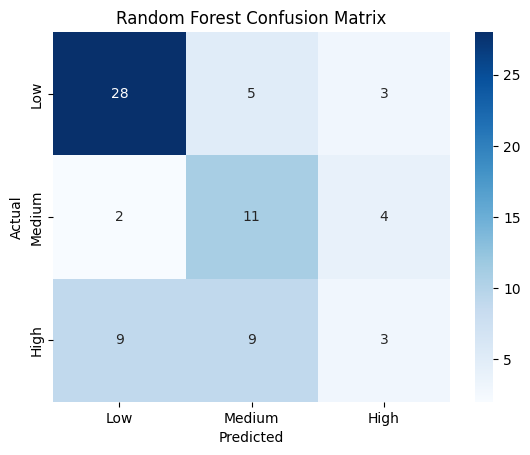

In [24]:
# Select specific features
X_train_selected = X_train[['Sleep_Hours', 'Device_Time']]
X_test_selected = X_test[['Sleep_Hours', 'Device_Time']]

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_selected, y_train_class)

# Make predictions
y_pred_rf_class = rf_classifier.predict(X_test_selected)

# Evaluate the classifier
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_class, y_pred_rf_class))

# Generate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_rf_class)

# Plot the confusion matrix using Seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


Random Forest performs slightly better than Logistic Regression and LDA with Sleep Hours and Device Time, particularly for the High class. However, it still struggles with the Medium class, suggesting a need for additional features or balancing techniques to further improve classification.

**Support Vector Machine (SVM): Sleep Hours and Device Time**


In [33]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Select features and target
X_train_2feat = X_train[['Sleep_Hours', 'Device_Time']]
X_test_2feat = X_test[['Sleep_Hours', 'Device_Time']]

# Initialize and train the SVM model
svm_2feat = SVC(kernel='rbf', random_state=42)  # You can experiment with 'linear', 'poly', etc.
svm_2feat.fit(X_train_2feat, y_train_class)

# Make predictions
y_pred_svm_2feat = svm_2feat.predict(X_test_2feat)

# Evaluate the model
print("\nSVM Classification Report (2 Features):")
print(classification_report(y_test_class, y_pred_svm_2feat))

# Calculate and print individual metrics
acc_svm_2feat = accuracy_score(y_test_class, y_pred_svm_2feat)
prec_svm_2feat = precision_score(y_test_class, y_pred_svm_2feat, average='macro')
rec_svm_2feat = recall_score(y_test_class, y_pred_svm_2feat, average='macro')
f1_svm_2feat = f1_score(y_test_class, y_pred_svm_2feat, average='macro')

print(f"Accuracy: {acc_svm_2feat:.4f}")
print(f"Precision (macro): {prec_svm_2feat:.4f}")
print(f"Recall (macro): {rec_svm_2feat:.4f}")
print(f"F1-Score (macro): {f1_svm_2feat:.4f}")



SVM Classification Report (2 Features):
              precision    recall  f1-score   support

        High       0.76      0.78      0.77        36
         Low       0.45      0.53      0.49        17
      Medium       0.29      0.24      0.26        21

    accuracy                           0.57        74
   macro avg       0.50      0.52      0.51        74
weighted avg       0.55      0.57      0.56        74

Accuracy: 0.5676
Precision (macro): 0.5003
Recall (macro): 0.5151
F1-Score (macro): 0.5056


**Interpretation:**

The SVM model using **Sleep_Hours** and **Device_Time** also achieves **57% accuracy**, performing best on **High** stress but struggling with **Low** and **Medium**, as shown by lower macro precision and recall.

## **Training Models using all features:**

**K-Nearest Neighbors (KNN):**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# (Optional) Discretize 'y' for classification if not already done
y_train_class = pd.cut(y_train, bins=[-float('inf'), 2, 3, float('inf')],
                       labels=["Low", "Medium", "High"], include_lowest=True, duplicates='drop')
y_test_class = pd.cut(y_test, bins=[-float('inf'), 2, 3, float('inf')],
                      labels=["Low", "Medium", "High"], include_lowest=True, duplicates='drop')

# Initialize and train the KNN model using all features
knn_all = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
knn_all.fit(X_train, y_train_class)

# Make predictions
y_pred_knn_all = knn_all.predict(X_test)

# Evaluate the model
print("KNN Classification Report (All Features):")
print(classification_report(y_test_class, y_pred_knn_all))

# Calculate and print individual metrics
acc_knn_all = accuracy_score(y_test_class, y_pred_knn_all)
prec_knn_all = precision_score(y_test_class, y_pred_knn_all, average='macro')
rec_knn_all = recall_score(y_test_class, y_pred_knn_all, average='macro')
f1_knn_all = f1_score(y_test_class, y_pred_knn_all, average='macro')

print(f"Accuracy: {acc_knn_all:.4f}")
print(f"Precision (macro): {prec_knn_all:.4f}")
print(f"Recall (macro): {rec_knn_all:.4f}")
print(f"F1-Score (macro): {f1_knn_all:.4f}")


KNN Classification Report (All Features):
              precision    recall  f1-score   support

        High       0.70      0.86      0.78        36
         Low       0.63      0.71      0.67        17
      Medium       0.27      0.14      0.19        21

    accuracy                           0.62        74
   macro avg       0.54      0.57      0.54        74
weighted avg       0.57      0.62      0.58        74

Accuracy: 0.6216
Precision (macro): 0.5363
Recall (macro): 0.5700
F1-Score (macro): 0.5431


With **all features**, KNN reaches about **62% accuracy**, performing strongly on **High** stress but still struggling with **Medium**, as seen by its low precision and recall there. Overall, the **macro F1-score of ~54%** indicates that while the model handles some categories well, there’s room for improvement, especially for **Medium** stress levels.

### **1- Logistic Regression:** "Classifying Stress Levels Using Logistic Regression"

In [25]:
from imblearn.over_sampling import SMOTE
# Bin the target variable into classes
y_train_class = pd.cut(y_train, bins=[-float('inf'), 2, 3, float('inf')], labels=["Low", "Medium", "High"], include_lowest=True, duplicates='drop')
y_test_class = pd.cut(y_test, bins=[-float('inf'), 2, 3, float('inf')], labels=["Low", "Medium", "High"], include_lowest=True, duplicates='drop')

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_class_resampled = smote.fit_resample(X_train, y_train_class)

# Initialize the Logistic Regression model with class weighting
logreg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Train the model on the resampled data
logreg.fit(X_train_resampled, y_train_class_resampled)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the Logistic Regression model
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test_class, y_pred_logreg))

# Calculate and print individual metrics
accuracy = accuracy_score(y_test_class, y_pred_logreg)
precision = precision_score(y_test_class, y_pred_logreg, average='macro')
recall = recall_score(y_test_class, y_pred_logreg, average='macro')
f1 = f1_score(y_test_class, y_pred_logreg, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-Score (macro): {f1:.4f}")



Logistic Regression Classification Report:
              precision    recall  f1-score   support

        High       0.72      0.78      0.75        36
         Low       0.79      0.88      0.83        17
      Medium       0.44      0.33      0.38        21

    accuracy                           0.68        74
   macro avg       0.65      0.66      0.65        74
weighted avg       0.65      0.68      0.66        74

Accuracy: 0.6757
Precision (macro): 0.6483
Recall (macro): 0.6645
F1-Score (macro): 0.6528


- The accuracy is 67.57%, indicating moderate performance.
- Precision, recall, and F1-score (macro averages) are consistent around 65%, reflecting balanced overall performance across all classes.

--> The model struggles most with the Medium class, which pulls down overall metrics, but performs reasonably well for High and Low stress levels. Further tuning or a different algorithm may improve results.

### **2- Linear Discriminant Analysis (LDA):** "Stress Level Classification with Linear Discriminant Analysis"

In [26]:
# Discretize 'y' for classification if needed
y_train_class = pd.cut(y_train, bins=[-float('inf'), 2, 3, float('inf')], labels=["Low", "Medium", "High"], include_lowest=True, duplicates='drop')
y_test_class = pd.cut(y_test, bins=[-float('inf'), 2, 3, float('inf')], labels=["Low", "Medium", "High"], include_lowest=True, duplicates='drop')

# Initialize and train the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train_class)

# Make predictions
y_pred_lda = lda.predict(X_test)

# Evaluate the LDA model
print("LDA Classification Report:")
print(classification_report(y_test_class, y_pred_lda))

# Calculate and print individual metrics
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_lda):.4f}")
print(f"Precision (macro): {precision_score(y_test_class, y_pred_lda, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test_class, y_pred_lda, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test_class, y_pred_lda, average='macro'):.4f}")

LDA Classification Report:
              precision    recall  f1-score   support

        High       0.69      0.81      0.74        36
         Low       0.88      0.88      0.88        17
      Medium       0.53      0.38      0.44        21

    accuracy                           0.70        74
   macro avg       0.70      0.69      0.69        74
weighted avg       0.69      0.70      0.69        74

Accuracy: 0.7027
Precision (macro): 0.7021
Recall (macro): 0.6896
F1-Score (macro): 0.6901


- The accuracy is 70.27%, slightly better than Logistic Regression.

- Precision, recall, and F1-score (macro averages) are all around 70%, reflecting balanced overall performance.

--> LDA improves slightly over Logistic Regression, especially for High and Low classes, but still struggles with the Medium class. It might benefit from addressing class imbalance or feature engineering.

### **3- Random Forest Classifier:** "Improving Stress Classification with Random Forest Classifier"

Random Forest Classification Report:
              precision    recall  f1-score   support

        High       0.71      0.89      0.79        36
         Low       0.88      0.88      0.88        17
      Medium       0.67      0.38      0.48        21

    accuracy                           0.74        74
   macro avg       0.75      0.72      0.72        74
weighted avg       0.74      0.74      0.72        74



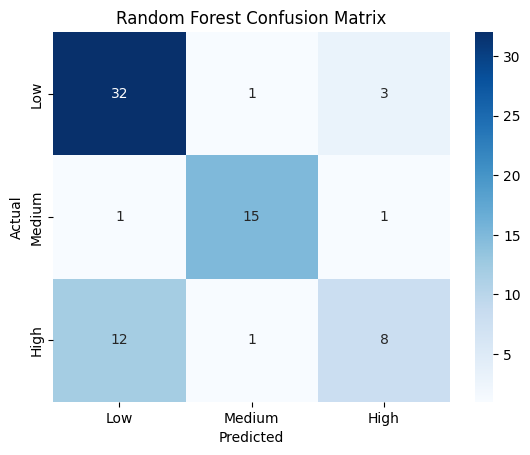

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Discretize 'y' for classification if needed
y_train_class = pd.cut(y_train, bins=[-float('inf'), 2, 3, float('inf')], labels=["Low", "Medium", "High"], include_lowest=True, duplicates='drop')
y_test_class = pd.cut(y_test, bins=[-float('inf'), 2, 3, float('inf')], labels=["Low", "Medium", "High"], include_lowest=True, duplicates='drop')

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here
rf_classifier.fit(X_train, y_train_class)

# Make predictions
y_pred_rf_class = rf_classifier.predict(X_test)

# Evaluate the classifier
print("Random Forest Classification Report:")
print(classification_report(y_test_class, y_pred_rf_class))

# Generate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_rf_class)

# Plot the confusion matrix using Seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


- The accuracy is 74%, showing an improvement over Logistic Regression and LDA.

- Precision, recall, and F1-score (macro averages) are around 72-75%, indicating balanced overall performance with a slight edge compared to earlier models.

--> The confusion matrix shows minimal misclassifications for the Low class, but the model struggles with the Medium class, often misclassifying it as Low. Additionally, 12 High instances were misclassified as Low, indicating difficulty in distinguishing between these classes.

**Support Vector Machine (SVM):**

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# (Optional) Discretize 'y' for classification if not already done
y_train_class = pd.cut(y_train, bins=[-float('inf'), 2, 3, float('inf')],
                       labels=["Low", "Medium", "High"], include_lowest=True, duplicates='drop')
y_test_class = pd.cut(y_test, bins=[-float('inf'), 2, 3, float('inf')],
                      labels=["Low", "Medium", "High"], include_lowest=True, duplicates='drop')

# Initialize and train the SVM model using all features
svm_all = SVC(kernel='rbf', random_state=42)  # Try 'linear', 'poly', etc. if you want
svm_all.fit(X_train, y_train_class)

# Make predictions
y_pred_svm_all = svm_all.predict(X_test)

# Evaluate the model
print("SVM Classification Report (All Features):")
print(classification_report(y_test_class, y_pred_svm_all))

# Calculate and print individual metrics
acc_svm_all = accuracy_score(y_test_class, y_pred_svm_all)
prec_svm_all = precision_score(y_test_class, y_pred_svm_all, average='macro')
rec_svm_all = recall_score(y_test_class, y_pred_svm_all, average='macro')
f1_svm_all = f1_score(y_test_class, y_pred_svm_all, average='macro')

print(f"Accuracy: {acc_svm_all:.4f}")
print(f"Precision (macro): {prec_svm_all:.4f}")
print(f"Recall (macro): {rec_svm_all:.4f}")
print(f"F1-Score (macro): {f1_svm_all:.4f}")


SVM Classification Report (All Features):
              precision    recall  f1-score   support

        High       0.51      0.97      0.67        36
         Low       0.33      0.06      0.10        17
      Medium       0.00      0.00      0.00        21

    accuracy                           0.49        74
   macro avg       0.28      0.34      0.26        74
weighted avg       0.33      0.49      0.35        74

Accuracy: 0.4865
Precision (macro): 0.2827
Recall (macro): 0.3437
F1-Score (macro): 0.2577


With **all features**, the SVM heavily favors the “High” class (97% recall) but struggles to correctly classify “Low” and “Medium,” leading to a low **49% accuracy** overall and a **macro F1-score of ~26%**. This suggests significant imbalances in the model’s predictions across different stress levels.

### **General Observations:**

- All three models—Logistic Regression, LDA, and Random Forest—perform well for the Low and High stress classes, with Random Forest achieving the highest accuracy (74%). However, all models struggle significantly with the Medium class, consistently showing low recall and F1-scores for this category. Random Forest shows the best overall balance between precision and recall, making it the most effective model among the three. Further improvements may focus on addressing the Medium class's misclassifications through balancing techniques or additional feature engineering.

# **General Conclusion on Feature Selection and Model Accuracy:**

**When using machine learning models, the accuracy typically increases as more features are added because multiple features provide a richer representation of the problem, enabling models to capture complex patterns and relationships. With a single feature, the accuracy is generally low due to limited information, while adding a second feature often improves accuracy moderately by incorporating complementary data. However, the highest accuracy is achieved when using all relevant features, as models can leverage diverse and interacting information. Models like Random Forest benefit significantly in this scenario due to their ability to handle non-linear relationships and feature interactions. Ultimately, the choice of features should balance between maximizing predictive power and minimizing redundancy or noise.**